# 기초데이터과학 (01분반)

## 14-1. 시계열 데이터 분석 기초 2 (Time series analysis basic 2)

### Acknowledgement
#### 이 자료는 다음 서적의 내용을 바탕으로 작성되었음
- 파이썬 라이브러리를 활용한 데이터 분석 (2판). 한빛미디어
- How to Decompose Time Series Data into Trend and Seasonality. (https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)
- Forecasting: Principles and Practice (2nd ed). (https://otexts.com/fpp2/)

### 시계열 데이터 분해
- 시계열 데이터를 구성하는 주요 요소를 분리하여 분석하는 방법

#### 구성 요소
- 추세(Trend): 데이터의 장기적인 뱡향성을 나타내며 시간에 따라 점진적으로 증가하거나 감소하는 패턴
  - 일반적으로 선형(Linear) 또는 비선형(Non-linear) 형태
  - 장기적인 데이터 특성을 나타냄
- 계절성(Seasonality): 일정 주기로 반복되는 패턴
  - 일정한 주기를 가짐 (예: 일별, 월별, 계절별)
- 잔차(Residuals) 또는 불규칙성(Irregularity): 추세와 계절성을 제거한 후 남은 불규칙한 변동
  - 랜덤하거나 예측 불가능한 요소를 나타내며 노이즈 또는 외부적 요인의 영향을 포함

#### 시계열 데이터 분해 목적
- 패턴 파악
  - 데이터를 구성하는 주요 요소(추세, 계절성, 잔차)를 분리하여 각 요소의 특성을 잘 이해할 수 있음
- 예측 정확도 향상
  - 계절성과 추세를 분리하여 데이터의 장기적 경향을 더 잘 모델링할 수 있음
- 노이즈 제거
  - 데이터를 분해해 잔차를 분석하여 불규칙한 변동의 원인을 탐구할 수 있음

#### 시계열 분해 모델
- 가법 모델 (Additive Model)
- 승법 모델 (Multiplicative Model) 

##### 시계열 데이터와 요소 표현
- $Y(t)$: 시계열 데이터
- $T(t)$: 추세(Trend)
- $S(t)$: 계절성(Seasonality)
- $R(t)$: 잔차(Residual)


##### 1. 가법 모델 (Additive Model)
$Y(t) = T(t) + S(t) + R(t)$

- 적용 조건
  - 데이터의 변화폭이 일정할 때
  - 계절적 변동의 진폭이 일정할 때

##### 2. 승법 모델 (Multiplicative Model)
$Y(t) = T(t) × S(t) × R(t)$

- 적용 조건
  - 데이터의 변화폭이 시간에 따라 점진적으로 증가하거나 감소할 때
  - 계절적 변동이 데이터 값에 비례할 때

#### 고전적 시계열 분해 방법
- 1920년대에 개발된 가장 초기의 시계열 분해 기법
- 절차가 비교적 간단하며, 이후 등장한 많은 시계열 분해 방법의 출발점 역할을 함
- 두 가지 형태
  - 가법 분해(Additive Decomposition): 데이터의 각 구성 요소(추세, 계절성, 잔차)가 선형적으로 더해진다고 가정
  - 승법 분해(Multiplicative Decomposition): 구성 요소들이 곱셈 관계에 있다고 가정

- 고전적 분해에서는 데이터의 계절 주기(period)를 𝑚으로 정의
  - m=4: 분기별 데이터(Quarterly data)
  - m=12: 월별 데이터(Monthly data)
  - m=7: 주간 패턴이 있는 일별 데이터(Daily data with weekly seasonality)

- 가정: 계절성의 연도별 일정성
  - 고전적 분해 방법에서는 계절성 패턴이 매년 일정하다고 가정. 즉, 각 주기마다 계절성 값(예: 월별 계절 패턴)이 일정하게 유지된다고 봄

#### 샘플 데이터를 이용한 시계열 분해 예제
- statsmodels의 seasonal_decompose() 함수 이용
  - 추세를 사용자가 지정한 주기(period)에 맞춰 이동 평균(Moving Average) 기반으로 계산 
  - 추세 계산 결과는 경계 구간(처음과 끝)에서 NaN 값이 나타날 수 있는데 이는 해당 구간에서 평균을 계산하기 위한 충분한 데이터가 없기 때문임

- 필요한 파이썬 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

- 가상의 샘플 데이터 생성

In [2]:
# 2023년 1월 1일부터 2024년 12월 31일까지 일 단위로 날짜 생성
date_rng = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D') 

print('날짜 길이:', len(date_rng))

# 추세 요소
trend = [0.05 * i for i in range(len(date_rng))] # 0.05씩 증가하는 선형 직선 데이터

# 계절성 요소
seasonality = [10 * np.sin(2 * np.pi * (i % 365) / 365) for i in range(len(date_rng))] # 365일 주기의 사인 곡선 데이터 

# 잔차(노이즈) 요소
residuals = np.random.normal(0, 2, len(date_rng)) # 평균 0, 표준편차 2인 정규분포를 따르는 랜덤 값을 date_rng 길이만큼 생성

날짜 길이: 731


- 샘플 데이터 시각화

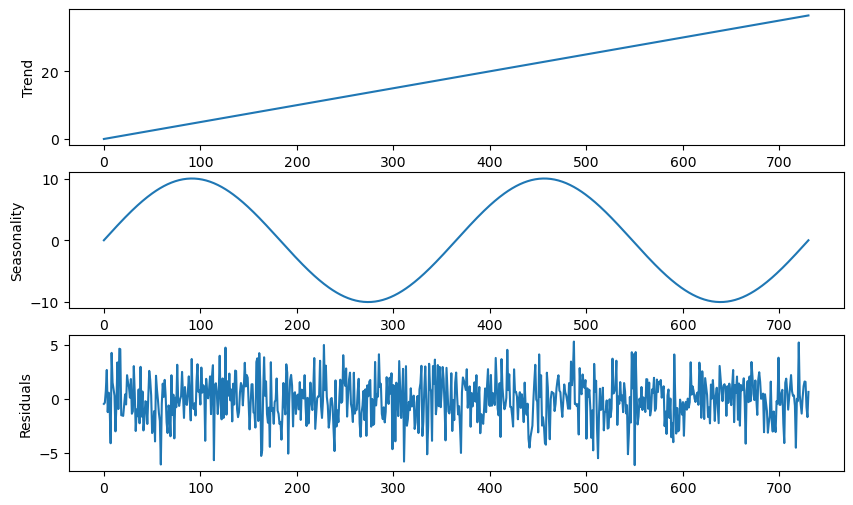

In [18]:
plt.figure(figsize=(10, 6))

plt.subplot(3,1,1)
plt.plot(trend, label='trend')
plt.ylabel('Trend')

plt.subplot(3,1,2)
plt.plot(seasonality, label='seasonality')
plt.ylabel('Seasonality')

plt.subplot(3,1,3)
plt.plot(residuals, label='residuals')
plt.ylabel('Residuals')

plt.show()

- 추세, 계절성, 잔차가 더해진 시계열 데이터 생성 및 시각화

               Value
Date                
2023-01-01 -0.452867
2023-01-02 -0.120745
2023-01-03  1.188123
2023-01-04  3.357281
2023-01-05 -0.329052
2023-01-06  1.689852
2023-01-07  0.490026
2023-01-08 -2.549359
2023-01-09  6.047488
2023-01-10  3.518901


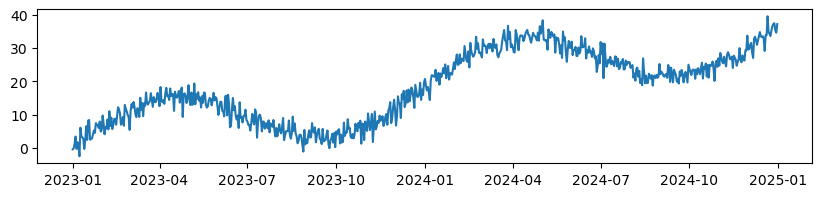

In [5]:
# 추세, 계절성, 잔차 요소를 더한 데이터 만들기
data = [t + s + n for t, s, n in zip(trend, seasonality, residuals)]

# 데이터프레임 생성
df = pd.DataFrame({'Date': date_rng, 'Value': data}) # Date, Value 2개의 컬럼을 가지는 dataframe 객체 생성
df.set_index('Date', inplace=True) # Date 컬럼을 인덱스로 설정

print(df.head(10))

# 시계열 데이터 시각화
plt.figure(figsize=(10, 2))
plt.plot(df['Value'], label='Original Data')
plt.show()

- 시계열 데이터 분해

In [6]:
# 시계열 데이터 분해
decomposition = seasonal_decompose(df['Value'], model='additive', period=365) 
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

# 시계열 구성 요소 추출
df['Trend'] = decomposition.trend # 추세 요소
df['Seasonality'] = decomposition.seasonal # 계절성 요소
df['Residual'] = decomposition.resid # 잔차 요소

- 시계열 분해 결과 시각화

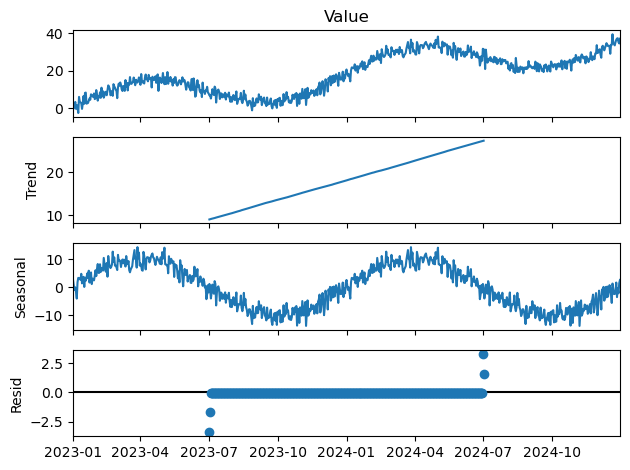

In [7]:
decomposition.plot()
plt.show()

- 시계열 분해 결과 시각화

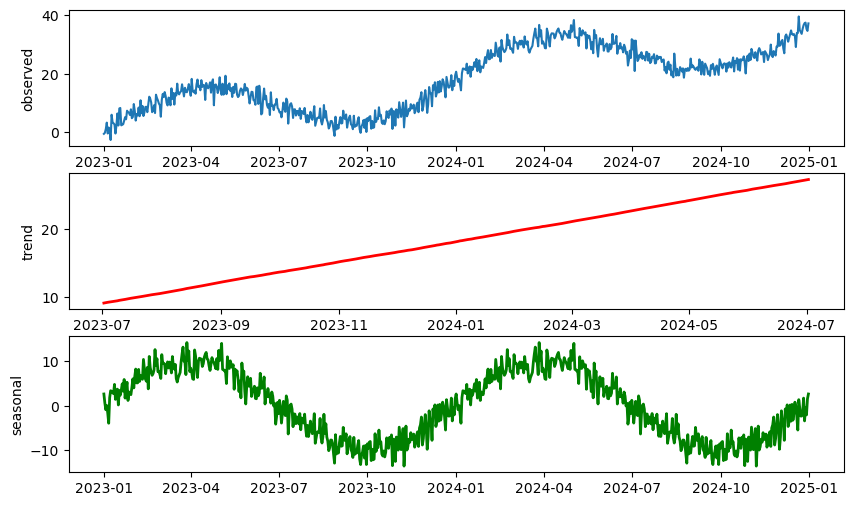

In [8]:
# 결과 시각화
plt.figure(figsize=(10, 6))

# 1) 원 데이터
plt.subplot(3,1,1)
plt.plot(df['Value'], label='Original Data')
plt.ylabel('observed')

# 2) 추세
plt.subplot(3,1,2)
plt.plot(df['Trend'], label='Estimated Trend', linewidth=2, color='red')
plt.ylabel('trend')

# 3) 계절성
plt.subplot(3,1,3)
plt.plot(df['Seasonality'], label='Estimated Seasonality', linewidth=2, color='green')
plt.ylabel('seasonal')

plt.show()

#### 항공 승객수 시계열 데이터 분해 
- 1949년부터 1960년까지 144개월치 월별 항공 승객수 (천명 단위)

In [9]:
import seaborn as sns

# 월별 flight 승객수 데이터
flights = sns.load_dataset('flights')
print(flights.head())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


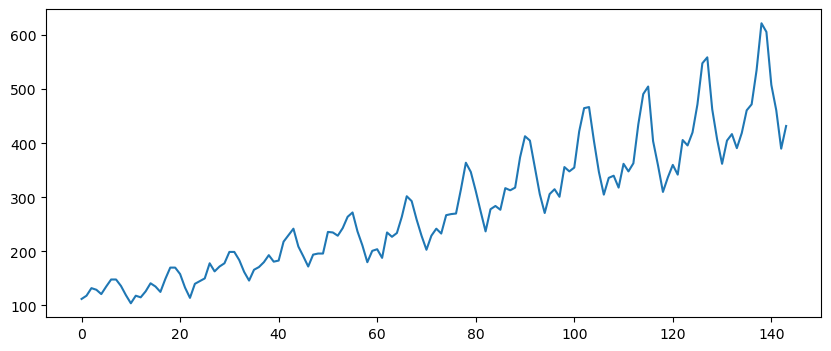

In [10]:
plt.figure(figsize=(10, 4))

# 승객수 데이터를 선 그래프로 가시화
plt.plot(flights['passengers'])
plt.show()

- 위 그래프를 보면 선형적으로 증가하는 추세를 예상할 수 있음
- 주기적으로 증가/감소를 반복하는 계절성도 볼 수 있는데, 그 진폭이 점점 커짐을 알 수 있음
  - additive model이 아니라 multiplicative model이 더 적합하다고 볼 수 있음 

- multiplicative model로 시계열 분해 및 결과 시각화

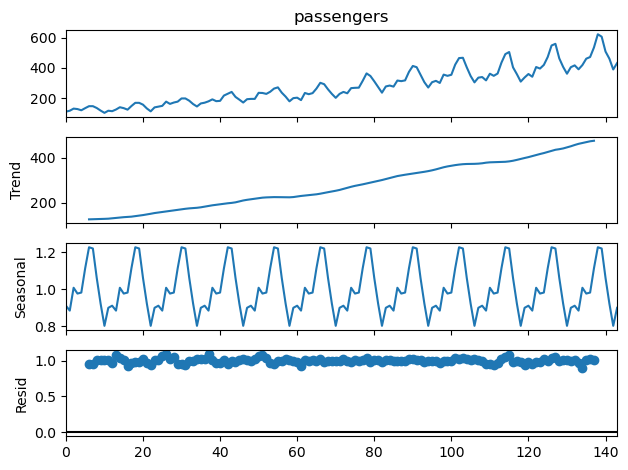

In [11]:
# 시계열 분해
result = seasonal_decompose(flights['passengers'], model='multiplicative', period=12)

result.plot() # seasonal_decompos() 함수의 반환값을 가지고 plot() 함수를 실행하면 원 데이터, 추세, 결정성, 잔차 요소를 한번에 그래프로 시각화
plt.show()

#### 시계열 분해 연습 문제
- 2020년 1월 2일부터 2020년 12월 30일까지 코스피 주가지수 데이터를 이용하여 시계열 분해를 해보자
  - Date 컬럼: 날짜
  - Close 컬럼: 코스피 주가 지수 수치

In [12]:
kospi = pd.read_csv('kospi.csv')
print(kospi.head())
print(kospi.tail())

         Date    Close   Ret
0  2020-01-02  2175.17 -1.02
1  2020-01-03  2176.46  0.06
2  2020-01-06  2155.07 -0.98
3  2020-01-07  2175.54  0.95
4  2020-01-08  2151.31 -1.11
           Date    Close   Ret
243  2020-12-23  2759.82  0.96
244  2020-12-24  2806.86  1.70
245  2020-12-28  2808.60  0.06
246  2020-12-29  2820.51  0.42
247  2020-12-30  2873.47  1.88


- Close 컬럼 값을 이용하여 선 그래프를 그리고 additive 모델, multiplicative 모델 2가지 방법으로 시계열 분해를 하여 결과를 시각화하시오
  - 주기는 30으로 가정한다

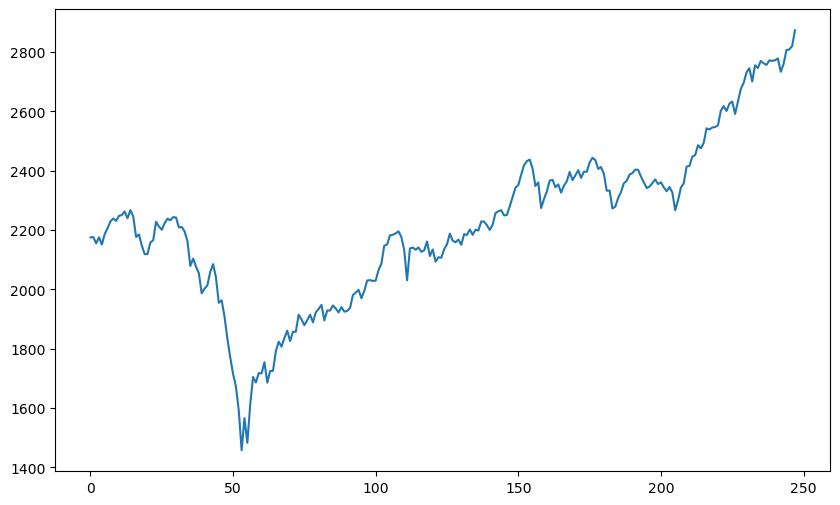

In [59]:
# 코드 작성


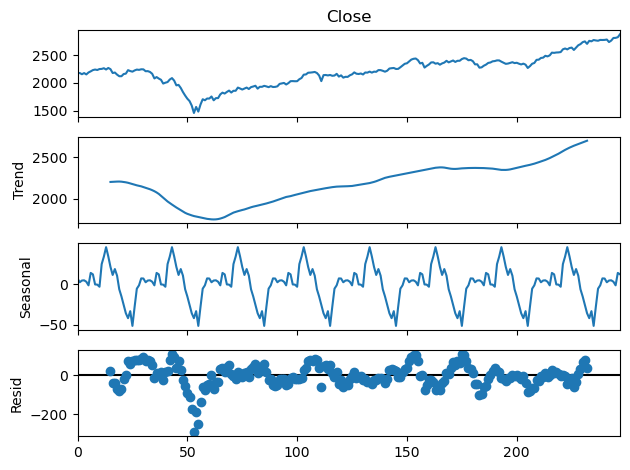

In [60]:
# additive model 시계열 분해 및 결과 가시화 코드 작성


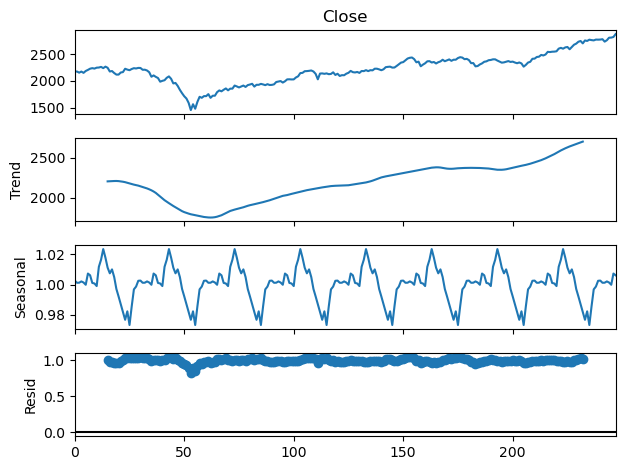

In [61]:
# multiplicative model 시계열 분해 및 결과 가시화 코드 작성


#### 고전적 시계열 분해 방법의 한계
- 가법 및 승법 모델은 데이터가 선형적이라는 가정을 하고 있어 복잡한 비선형 데이터에는 부적합
- 추세를 추정하기 위해 이동 평균(Moving Average) 방법을 사용하는데 MA를 계산할 때 데이터의 앞/뒤 부분에 이동 평균을 구할 수 없는 부분 존재
- 정확한 주기 설정이 어려움 (데이터에 내재된 정확한 계절성을 추정하기 어려울 수 있음)
- 시간에 따른 계절성 요소의 변화에 대처하기 어려움

#### 고전적 시계열 분해 방법의 한계를 극복하기 위한 대안
- X11 분해
- SEATS 분해 (SEATS: Seasonal Extraction in ARIMA Time Series)
- STL 분해 (STL: Seasonal and Trend decomposition using Loess)
- ...

#### STL (Seasonal and Trend decomposition using Loess)
- Loess(Locally Weighted Regression): 비선형 관계를 추정하는 회귀 방법
- R. B. Cleveland와 동료들에 의해 1990년에 개발된 기법

##### STL의 장점
- 계절성 처리: SEATS, X11 같은 방법은 월별 또는 분기별 데이터에만 적합하나 STL은 주간, 연간 등 다양한 주기를 지원
- 계절성의 변화 허용: 계절성이 시간이 지남에 따라 변할 수 있는 계절성 요소가 있는 데이터도 적용 가능하고 사용자 설정을 통해 계절성 변화 속도를 조정 가능함
- 추세 평활화 정도를 사용자가 조정 가능함
- 이상치에 대한 강건함(robust)

##### STL 방법을 이용한 시계열 분해 예제
- statsmodels 패키지의 STL 모듈
  - https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.STL.html

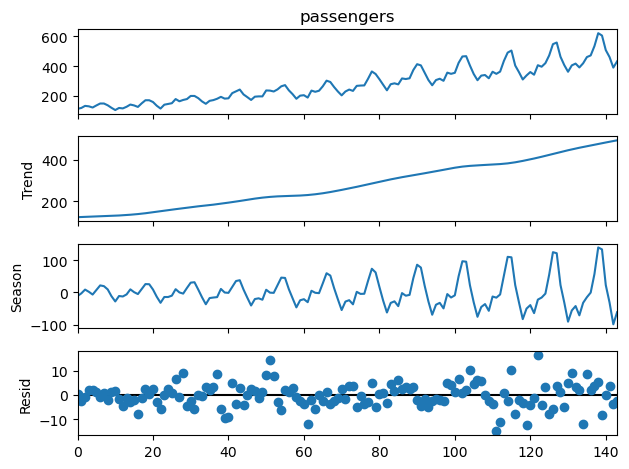

In [13]:
from statsmodels.tsa.seasonal import STL

# STL 분해
stl = STL(flights['passengers'], period=12)
result = stl.fit()

# 분해 결과 시각화
result.plot()
plt.show()

### 이동 평균(Moving Average)
- 시계열 데이터를 평활화(smoothing)하여 단기적인 변동을 제거하고 데이터의 장기적인 추세를 파악하기 위해 사용되는 기법
- 일정한 기간(윈도우 크기) 동안의 데이터 평균값을 계산하여 시계열 데이터의 노이즈를 줄이고 평활화
  - 윈도우 예: 10일, 20일, 60일

#### 단순 이동 평균 (Simple Moving Average, SMA)
- 모든 관측값에 동일한 가중치를 부여하여 평균을 계산
  - 계산이 간단하고 직관적임
  - 최근 데이터와 과거 데이터를 동일한 가중치로 취급하므로 최신 데이터의 중요한 특성을 반영하지 못 할 수 있음

$MA_t = \frac{1}{n} \sum_{i=0}^{n-1} Y_{t-i} = \frac{Y_t + Y_{t-1} + \dots + Y_{t-n+1}}{n}$

- $MA_t$: $t$ 시점의 이동 평균 값
- $Y_t$: $t$ 시점의 실제 값
- $n$: 윈도우 크기 (평균을 계산하는 기간)

#### 지수 가중 이동 평균 (Exponential Weighted Moving Average, EWMA) 
- 과거 데이터에 지수적으로 감소하는 가중치를 부여하는 기법 (최신 데이터가 평균값에 더 큰 영향을 미침)
  - 최근 데이터에 더 민감하게 반응하며 단순 이동 평균보다 데이터의 변화를 더 잘 반영함
- Exponential smoothing(지수 평활)이라고도 함

$EWM_t = \alpha Y_t + (1-\alpha) EWM_{t-1}$

- $EWM_t$: $t$ 시점의 이동 평균 값
- $Y_t$: $t$ 시점의 실제 값
- $\alpha$: 평활 계수 ($ 0 <$ $\alpha$ $< 1$)

#### 단순 이동 평균 계산 예제 1
- DataFrame의 rolling() 함수 이용
  - 이동 윈도우 기반의 통계 계산 지원
  - 반환값을 이용해 집계 함수(mean(), sum(), min(), max() 등)를 호출하여 원하는 결과 계산
  - 시계열 데이터 분석의 핵심 도구
  - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [14]:
# 샘플 데이터 생성
data = {'Value': [10, 20, 30, 40, 50, 60, 70]}
df = pd.DataFrame(data)

# 3개 값의 이동 평균 계산
df['Moving_Avg'] = df['Value'].rolling(window=3).mean() # rolling() 함수의 window 매개변수로 윈도우 크기를 지정
print(df)

print()

# 3개 값의 이동 합계 계산
df['Moving_Sum'] = df['Value'].rolling(window=3).sum()
print(df)

   Value  Moving_Avg
0     10         NaN
1     20         NaN
2     30        20.0
3     40        30.0
4     50        40.0
5     60        50.0
6     70        60.0

   Value  Moving_Avg  Moving_Sum
0     10         NaN         NaN
1     20         NaN         NaN
2     30        20.0        60.0
3     40        30.0        90.0
4     50        40.0       120.0
5     60        50.0       150.0
6     70        60.0       180.0


#### 단순 이동 평균 계산 예제 2

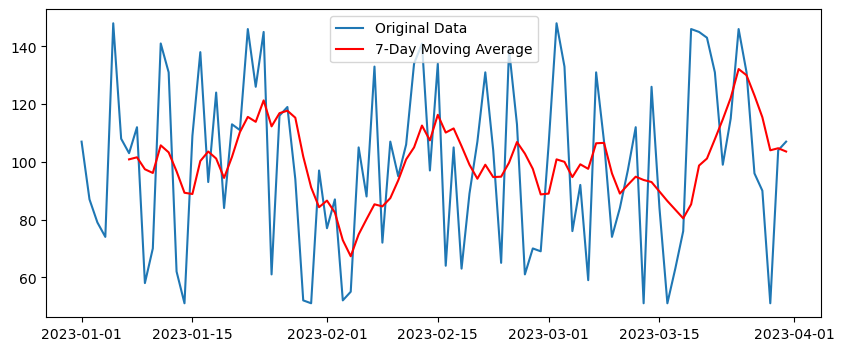

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시계열 데이터 생성
date_rng = pd.date_range(start='2023-01-01', end='2023-03-31', freq='D') # 2023년 1월 1일부터 2023년 3월 31일까지 일('D') 단위 날짜 생성
data = np.random.randint(50, 150, len(date_rng)) # 위 날짜 길이만큼의 50부터 150 사이의 랜덤 정수값 생성
df = pd.DataFrame({'Date': date_rng, 'Value': data}) # 위 날짜와 데이터로 DataFrame 객체 생성
df.set_index('Date', inplace=True) # Date 컬럼을 인덱스로 설정

# 윈도우 크기 7인 단순 이동 평균 계산
df['SMA_7'] = df['Value'].rolling(window=7).mean()

# 시각화
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original Data')
plt.plot(df['SMA_7'], label='7-Day Moving Average', color='red')
plt.legend()
plt.show()

#### 지수 가중 이동 평균 계산 예제 1
- DataFrame의 ewm() 함수 이용
- rolling() 함수와 유사하게 반환값에 통계 함수(mean(), sum(), var() 등)를 호출하여 결과를 계산
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [ ]:
DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=1, adjust=True, ignore_na=False, axis=0)

##### 평활계수 설정 방법
- **`alpha 직접 설정`**: $ \alpha = \text{사용자가 지정한 값} $
- **`com`**: $ \alpha = \frac{1}{1 + \text{com}} $
- **`span`**: $ \alpha = \frac{2}{\text{span} + 1} $
- **`halflife`**: $ \alpha = 1 - e^{-\ln(2) / \text{halflife}} $

In [16]:
import pandas as pd

# 샘플 데이터 생성
data = [10, 20, 30, 40, 50, 60, 70]
df = pd.DataFrame({'Value': data})

# EWMA 계산 (span=3)
df['EWMA'] = df['Value'].ewm(span=3, adjust=False).mean() # span이 3이면 a는 0.5
print(df)
# EWMA 초기값은 원 값 그대로 유지

   Value      EWMA
0     10  10.00000
1     20  15.00000
2     30  22.50000
3     40  31.25000
4     50  40.62500
5     60  50.31250
6     70  60.15625


#### 지수 가중 이동 평균 계산 예제 2

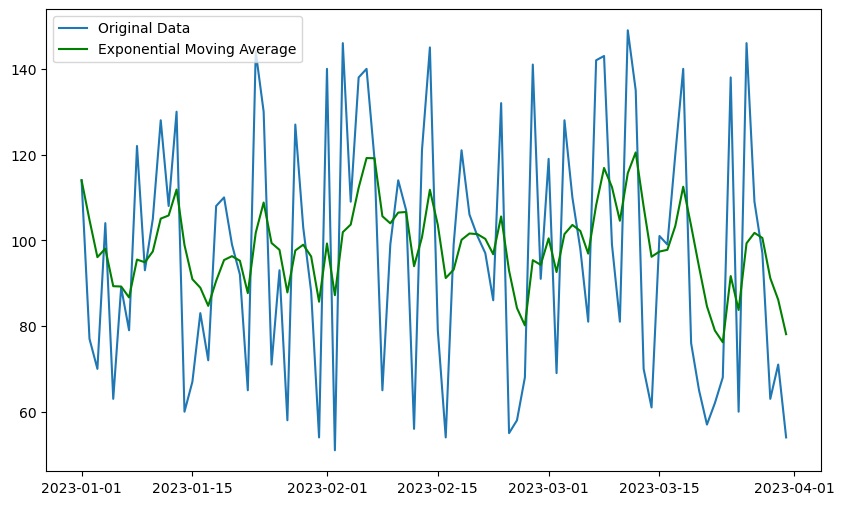

In [17]:
# 시계열 데이터 생성
date_rng = pd.date_range(start='2023-01-01', end='2023-03-31', freq='D') # 2023년 1월 1일부터 2023년 3월 31일까지 일('D') 단위 날짜 생성
data = np.random.randint(50, 150, len(date_rng)) # 위 날짜 길이만큼의 50부터 150 사이의 랜덤 정수값 생성
df = pd.DataFrame({'Date': date_rng, 'Value': data}) # 위 날짜와 데이터로 DataFrame 객체 생성
df.set_index('Date', inplace=True) # Date 컬럼을 인덱스로 설정

# 지수 가중 이동 평균 계산
df['EWMA_7'] = df['Value'].ewm(span=7, adjust=False).mean() # span이 7이면 a는 0.25

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original Data')
plt.plot(df['EWMA_7'], label='Exponential Moving Average', color='green')
plt.legend()
plt.show()

#### 이동평균 연습문제 1 
- 코스피 주가 지수 데이터의 단순 이동 평균값을 구해보자
  - 5일 이동 평균
  - 20일 이동 평균
  - 60일 이동 평균

In [81]:
kospi = pd.read_csv('kospi.csv')

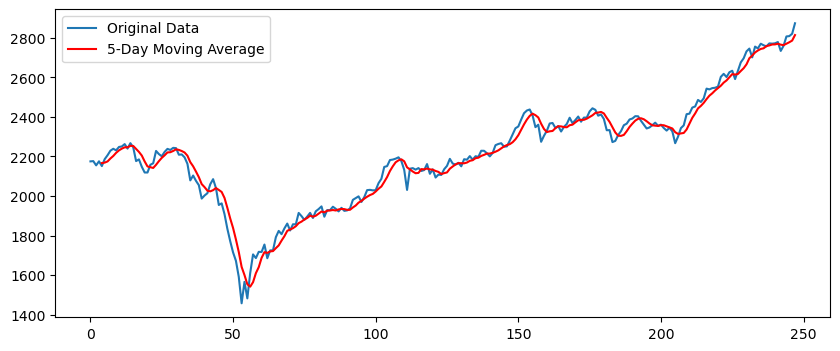

In [78]:
# 윈도우 크기 5인 단순 이동 평균 계산


# 시각화


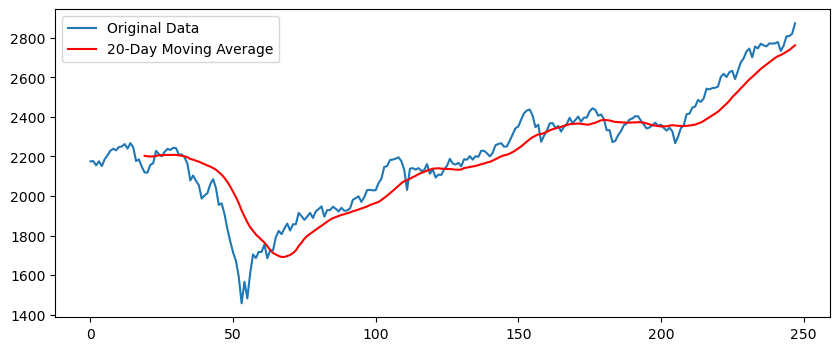

In [79]:
# 윈도우 크기 20인 단순 이동 평균 계산


# 시각화


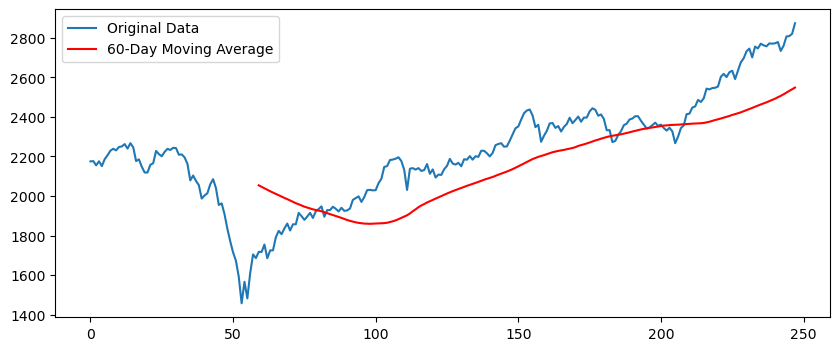

In [80]:
# 윈도우 크기 60인 단순 이동 평균 계산


# 시각화


#### 이동평균 연습문제 2
- 항공 승객수 데이터의 지수 가중 이동 평균값을 구해보자
  - span: 7
  - span: 30

In [82]:
# 월별 항공 승객수 데이터
flights = sns.load_dataset('flights')

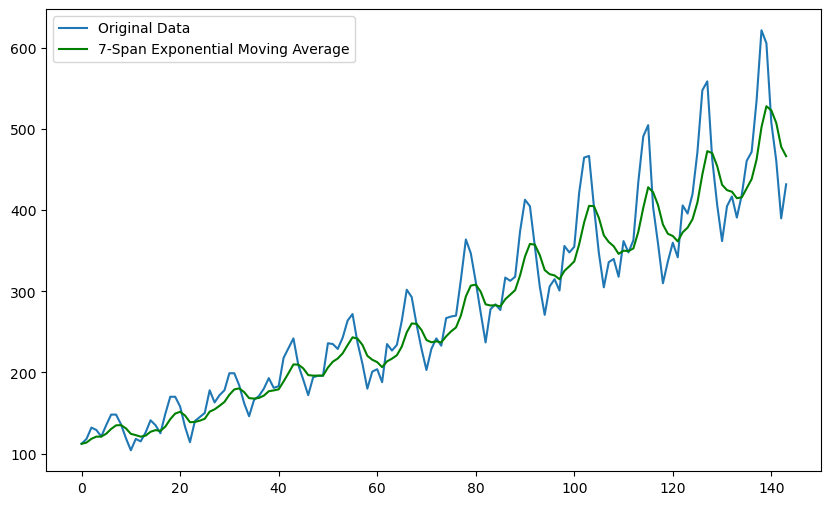

In [85]:
# 지수 가중 이동 평균 계산 (span=7)


# 시각화


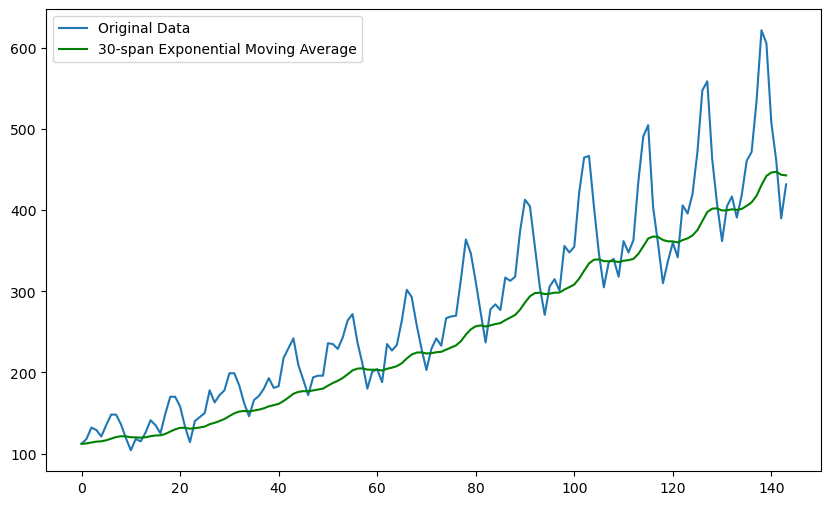

In [88]:
# 지수 가중 이동 평균 계산 (span=30)


# 시각화
